In [1]:
# Problem statement : Input preparation
# Transforming dataset into csv 
# Normalizing dataset
# Defining what makes a good investment(i.e data fields of interest)
# Model creation 
# Creating neural network (L-Short term memory network)
# first sigmoid function
# sigmoid function and the second is the tanh function 
# final output
# Model Training
# Plotting predictions
# Dashboards

In [1]:
import pandas as pd

In [2]:
df_train = pd.read_csv('GOOG_train10.csv')
df_test = pd.read_csv('GOOG_test10.csv')

In [4]:
df_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-01-03,297.126312,301.664276,297.126312,301.046600,301.046600,4748131
1,2011-01-04,301.679230,301.958191,298.939514,299.935760,299.935760,3662677
2,2011-01-05,298.914581,304.025452,298.904633,303.397797,303.397797,5083583
3,2011-01-06,304.199799,308.060303,303.885956,305.604523,305.604523,4131026
4,2011-01-07,306.805023,307.970642,303.925812,307.069031,307.069031,4218152


In [5]:
df_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-12-14,2895.399902,2908.840088,2844.850098,2899.409912,2899.409912,1238900
1,2021-12-15,2887.320068,2950.344971,2854.110107,2947.370117,2947.370117,1364000
2,2021-12-16,2961.540039,2971.030029,2881.850098,2896.770020,2896.770020,1370000
3,2021-12-17,2854.290039,2889.201904,2835.760010,2856.060059,2856.060059,2162800
4,2021-12-20,2813.592041,2852.209961,2805.000000,2848.030029,2848.030029,1013200


In [6]:
df_train = df_train.filter(['Close'])
df_test = df_test.filter(['Close'])

In [7]:
# Creating copy of df to use 
df_train_copy = df_train.copy()
df_test_copy = df_test.copy()

In [8]:
df_train_copy = df_train_copy.values
df_test_copy = df_test_copy.values

In [9]:
df_train

,Close
0,301.046600
1,299.935760
2,303.397797
3,305.604523
4,307.069031
...,...
2751,2960.729980
2752,2974.409912
2753,2962.120117
2754,2973.500000


In [10]:
df_test

,Close
0,2899.409912
1,2947.370117
2,2896.770020
3,2856.060059
4,2848.030029
5,2884.409912
6,2938.979980
7,2942.850098
8,2961.280029
9,2928.959961


In [11]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
df_train = scaler.fit_transform(df_train)
df_test = scaler.fit_transform(df_test)

In [12]:
df_train

array([[0.02321884],
       [0.02281891],
       [0.02406531],
       ...,
       [0.98125745],
       [0.98535443],
       [0.97116609]])

In [13]:
df_test

array([[0.85495908],
       [0.96739126],
       [0.84877043],
       [0.75333485],
       [0.7345102 ],
       [0.81979486],
       [0.94772242],
       [0.95679507],
       [1.        ],
       [0.92423269],
       [0.92688202],
       [0.90334535],
       [0.84131577],
       [0.85983536],
       [0.82898483],
       [0.5118974 ],
       [0.50709151],
       [0.48146868],
       [0.5550554 ],
       [0.62273506],
       [0.69918173],
       [0.58117101],
       [0.61190421],
       [0.44799228],
       [0.41805577],
       [0.31746232],
       [0.15737186],
       [0.17049949],
       [0.        ],
       [0.11742523],
       [0.11184554],
       [0.3072885 ],
       [0.42023579],
       [0.52244666],
       [0.99871053],
       [0.74618468],
       [0.76332151],
       [0.57212183],
       [0.58501538],
       [0.69003927],
       [0.5563918 ],
       [0.346696  ]])

In [14]:
len(df_train)

2756

In [15]:
i = 2756

In [16]:
df_train[i-10:i, 0]

array([0.9405464 , 0.9345413 , 0.95008332, 0.94103958, 0.95022729,
       0.98075697, 0.98568201, 0.98125745, 0.98535443, 0.97116609])

In [17]:
df_train_copy

array([[ 301.0466  ],
       [ 299.93576 ],
       [ 303.397797],
       ...,
       [2962.120117],
       [2973.5     ],
       [2934.090088]])

In [18]:
x_train = []
y_train = []

for i in range(10,len(df_train)):
    x_train.append(df_train[i-10:i, 0])
    y_train.append(df_train_copy[i, 0])

In [19]:
x_test = []
y_test = []

for i in range(10,len(df_test)):
    x_test.append(df_test[i-10:i, 0])
    y_test.append(df_test_copy[i, 0])

In [20]:
x_train

[array([0.02321884, 0.02281891, 0.02406531, 0.02485978, 0.02538703,
        0.0249871 , 0.02530991, 0.02546415, 0.02543187, 0.02677511]),
 array([0.02281891, 0.02406531, 0.02485978, 0.02538703, 0.0249871 ,
        0.02530991, 0.02546415, 0.02543187, 0.02677511, 0.02954587]),
 array([0.02406531, 0.02485978, 0.02538703, 0.0249871 , 0.02530991,
        0.02546415, 0.02543187, 0.02677511, 0.02954587, 0.02813268]),
 array([0.02485978, 0.02538703, 0.0249871 , 0.02530991, 0.02546415,
        0.02543187, 0.02677511, 0.02954587, 0.02813268, 0.02723959]),
 array([0.02538703, 0.0249871 , 0.02530991, 0.02546415, 0.02543187,
        0.02677511, 0.02954587, 0.02813268, 0.02723959, 0.02456028]),
 array([0.0249871 , 0.02530991, 0.02546415, 0.02543187, 0.02677511,
        0.02954587, 0.02813268, 0.02723959, 0.02456028, 0.02442578]),
 array([0.02530991, 0.02546415, 0.02543187, 0.02677511, 0.02954587,
        0.02813268, 0.02723959, 0.02456028, 0.02442578, 0.02600933]),
 array([0.02546415, 0.02543187, 0.

In [21]:
# Convert the x_train and y_train to numpy arrays 
import numpy as np
x_train, y_train = np.array(x_train), np.array(y_train)

In [22]:
np.array(x_train).shape

(2746, 10)

In [23]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

In [24]:
x_train.shape

(2746, 10, 1)

In [25]:
import numpy as np
x_test, y_test = np.array(x_test), np.array(y_test)
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
# x_train.shape

In [26]:
x_train.shape[1]

10

In [27]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128,activation="tanh",
    recurrent_activation="sigmoid",return_sequences=True, input_shape= (x_train.shape[1], 1)))

model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=4, epochs=10)

Epoch 1/10
687/687 [==============================] - 11s 9ms/step - loss: 692845.8125
Epoch 2/10
687/687 [==============================] - 6s 9ms/step - loss: 190931.0156
Epoch 3/10
687/687 [==============================] - 7s 10ms/step - loss: 36802.8242
Epoch 4/10
687/687 [==============================] - 7s 10ms/step - loss: 8173.3101
Epoch 5/10
687/687 [==============================] - 8s 11ms/step - loss: 3709.5098
Epoch 6/10
687/687 [==============================] - 8s 12ms/step - loss: 2288.9053
Epoch 7/10
687/687 [==============================] - 7s 10ms/step - loss: 2451.6519
Epoch 8/10
687/687 [==============================] - 6s 9ms/step - loss: 1825.0807
Epoch 9/10
687/687 [==============================] - 6s 9ms/step - loss: 1521.8097
Epoch 10/10
687/687 [==============================] - 6s 9ms/step - loss: 1516.4438


In [28]:
# Get the models predicted price values 
predictions = model.predict(x_test)

1/1 [==============================] - 1s 1s/step


In [29]:
pd.DataFrame({'Actual':y_test,'Prediction':predictions[:,0]})

,Actual,Prediction
0,2930.090088,2635.796143
1,2920.050049,2649.529053
2,2893.590088,2651.977539
3,2901.489990,2683.445068
4,2888.330078,2727.921387
5,2753.070068,2761.635498
6,2751.020020,2751.990234
7,2740.090088,2690.252686
8,2771.479980,2577.446045
9,2800.350098,2394.415527


In [30]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

1054.3914823384375

In [31]:
# Grid Search
# random Search
# https://stackoverflow.com/questions/40761185/what-is-the-intuition-of-using-tanh-in-lstm
# https://www.kaggle.com/code/shujunge/gridsearchcv-with-keras/notebook

In [32]:
import matplotlib.pyplot as plt

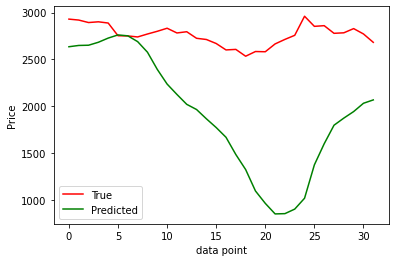

In [33]:
plt.plot(y_test,label='True',color='r')
plt.plot(predictions,label='Predicted',color='g')
plt.ylabel('Price')
plt.xlabel('data point')
plt.legend()